# Assignment 2 specification

The purpose of this assignment is to use clustering and classification to predict various aspects of internet users based on data collected from a survey.

The survey has a large number of columns (features) so you will need to choose a suitable subset both for clustering and for classification.

The rest of this notebook provides basic help with preparing the data for analysis.

## Background

In [181]:
import pandas as pd

See https://www.openml.org/d/372 for description and https://www.openml.org/data/download/52407/internet_usage.arff for the data file itself. The data comprises mostly binary and some categorical (multi-valued) columns, with just 2 numeric columns, all relating to internet users circa 1997.

The first thing to do is to load the data.

In [182]:
from scipy.io import arff
filePath = 'internet_usage.arff'
data, meta = arff.loadarff(filePath)
df = pd.DataFrame(data)
df.head()

,Actual_Time,Age,Community_Building,Community_Membership_Family,Community_Membership_Hobbies,Community_Membership_None,Community_Membership_Other,Community_Membership_Political,Community_Membership_Professional,Community_Membership_Religious,...,Web_Page_Creation,Who_Pays_for_Access_Dont_Know,Who_Pays_for_Access_Other,Who_Pays_for_Access_Parents,Who_Pays_for_Access_School,Who_Pays_for_Access_Self,Who_Pays_for_Access_Work,Willingness_to_Pay_Fees,Years_on_Internet,who
0,b'Consultant',b'41',b'Equally',b'0',b'0',b'1',b'0',b'0',b'0',b'0',...,b'Yes',b'0',b'0',b'0',b'0',b'1',b'0',b'Other_sources',b'1-3_yr',b'93819'
1,b'College_Student',b'28',b'Equally',b'0',b'0',b'0',b'0',b'0',b'0',b'0',...,b'No',b'0',b'0',b'0',b'0',b'1',b'0',b'Already_paying',b'Under_6_mo',b'95708'
2,b'Other',b'25',b'More',b'1',b'1',b'0',b'0',b'0',b'1',b'0',...,b'Yes',b'0',b'0',b'0',b'0',b'1',b'1',b'Other_sources',b'1-3_yr',b'97218'
3,b'Salesperson',b'28',b'More',b'0',b'0',b'0',b'1',b'0',b'0',b'0',...,b'Yes',b'0',b'0',b'0',b'0',b'1',b'0',b'Already_paying',b'1-3_yr',b'91627'
4,b'K-12_Student',b'17',b'More',b'0',b'0',b'0',b'0',b'1',b'1',b'0',...,b'Yes',b'0',b'0',b'0',b'0',b'1',b'0',b'Already_paying',b'1-3_yr',b'49906'


As can be seen, the data is loaded into a dataframe but in a binary representation. We choose to convert the binary text into strings, as they are much easier to handle.

In [183]:
for col in df.columns:
  df[col] = df[col].apply(lambda x: x.decode("utf-8"))
df.head()

,Actual_Time,Age,Community_Building,Community_Membership_Family,Community_Membership_Hobbies,Community_Membership_None,Community_Membership_Other,Community_Membership_Political,Community_Membership_Professional,Community_Membership_Religious,...,Web_Page_Creation,Who_Pays_for_Access_Dont_Know,Who_Pays_for_Access_Other,Who_Pays_for_Access_Parents,Who_Pays_for_Access_School,Who_Pays_for_Access_Self,Who_Pays_for_Access_Work,Willingness_to_Pay_Fees,Years_on_Internet,who
0,Consultant,41,Equally,0,0,1,0,0,0,0,...,Yes,0,0,0,0,1,0,Other_sources,1-3_yr,93819
1,College_Student,28,Equally,0,0,0,0,0,0,0,...,No,0,0,0,0,1,0,Already_paying,Under_6_mo,95708
2,Other,25,More,1,1,0,0,0,1,0,...,Yes,0,0,0,0,1,1,Other_sources,1-3_yr,97218
3,Salesperson,28,More,0,0,0,1,0,0,0,...,Yes,0,0,0,0,1,0,Already_paying,1-3_yr,91627
4,K-12_Student,17,More,0,0,0,0,1,1,0,...,Yes,0,0,0,0,1,0,Already_paying,1-3_yr,49906


The dataframe looks more standard now, but we notice that there is abn anonymised user code 'who' which is a candidate for the dataframe's index. We check that each row has a unique 'who' value:

In [184]:
numRows = df.shape[0]
numUniq = len(df['who'].unique().tolist())
print(numRows-numUniq)

0


It does, so we set 'who' as the index and it no longer appears in the list of columns, which we can check below.

In [185]:
if 'who' in df.columns:
  df.set_index('who', inplace=True)

print(df.columns)

Index(['Actual_Time', 'Age', 'Community_Building',
       'Community_Membership_Family', 'Community_Membership_Hobbies',
       'Community_Membership_None', 'Community_Membership_Other',
       'Community_Membership_Political', 'Community_Membership_Professional',
       'Community_Membership_Religious', 'Community_Membership_Support',
       'Country', 'Disability_Cognitive', 'Disability_Hearing',
       'Disability_Motor', 'Disability_Not_Impaired', 'Disability_Not_Say',
       'Disability_Vision', 'Education_Attainment',
       'Falsification_of_Information', 'Gender', 'Household_Income',
       'How_You_Heard_About_Survey_Banner',
       'How_You_Heard_About_Survey_Friend',
       'How_You_Heard_About_Survey_Mailing_List',
       'How_You_Heard_About_Survey_Others',
       'How_You_Heard_About_Survey_Printed_Media',
       'How_You_Heard_About_Survey_Remebered',
       'How_You_Heard_About_Survey_Search_Engine',
       'How_You_Heard_About_Survey_Usenet_News',
       'How_You_Heard

As can be seen, we have ensured that the 'who' column is no longer available as a feature. Also note that all columns are treated as 'object', effectively as strings. For your convenience, I have classified the columns for you, see below. I have also changed the types of numeric and 'boolean' (0,1)-valued columns. The latter are then binarised and ready for analysis.

In [186]:
numericCols = ['Age', 'Opinions_on_Censorship']
boolCols = ['Community_Membership_Family', 'Community_Membership_Hobbies',
       'Community_Membership_None', 'Community_Membership_Other',
       'Community_Membership_Political', 'Community_Membership_Professional',
       'Community_Membership_Religious', 'Community_Membership_Support',
       'Disability_Cognitive', 'Disability_Hearing',
       'Disability_Motor', 'Disability_Not_Impaired', 'Disability_Not_Say',
       'Disability_Vision', 'How_You_Heard_About_Survey_Banner',
       'How_You_Heard_About_Survey_Friend',
       'How_You_Heard_About_Survey_Mailing_List',
       'How_You_Heard_About_Survey_Others',
       'How_You_Heard_About_Survey_Printed_Media',
       'How_You_Heard_About_Survey_Remebered',
       'How_You_Heard_About_Survey_Search_Engine',
       'How_You_Heard_About_Survey_Usenet_News',
       'How_You_Heard_About_Survey_WWW_Page', 'Not_Purchasing_Bad_experience',
       'Not_Purchasing_Bad_press', 'Not_Purchasing_Cant_find',
       'Not_Purchasing_Company_policy', 'Not_Purchasing_Easier_locally',
       'Not_Purchasing_Enough_info', 'Not_Purchasing_Judge_quality',
       'Not_Purchasing_Never_tried', 'Not_Purchasing_No_credit',
       'Not_Purchasing_Not_applicable', 'Not_Purchasing_Not_option',
       'Not_Purchasing_Other', 'Not_Purchasing_Prefer_people',
       'Not_Purchasing_Privacy', 'Not_Purchasing_Receipt',
       'Not_Purchasing_Security', 'Not_Purchasing_Too_complicated',
       'Not_Purchasing_Uncomfortable', 'Not_Purchasing_Unfamiliar_vendor',
           'Who_Pays_for_Access_Dont_Know',
       'Who_Pays_for_Access_Other', 'Who_Pays_for_Access_Parents',
       'Who_Pays_for_Access_School', 'Who_Pays_for_Access_Self',
       'Who_Pays_for_Access_Work']
strCols = ['Actual_Time', 'Community_Building', 'Country', 'Education_Attainment', 'Falsification_of_Information',
           'Gender', 'Household_Income', 'Major_Geographical_Location', 'Major_Occupation', 'Marital_Status',
           'Most_Import_Issue_Facing_the_Internet', 'Primary_Computing_Platform', 'Primary_Language',
           'Primary_Place_of_WWW_Access', 'Race', 'Registered_to_Vote', 'Sexual_Preference', 'Web_Ordering',
           'Web_Page_Creation', 'Willingness_to_Pay_Fees', 'Years_on_Internet' ]


for col in numericCols:
  df[col] = pd.to_numeric(df[col], errors='coerce')

for col in boolCols:
  df[col] = df[col].map({'0': 0, '1': 1})


According to the data description, the original internet_usage data had 2699 missing values in the 'Primary_Computing_Platform' column. In this version of the dataset, the missing values have already been replaced with '?', see below, so no further action is needed.

In [187]:
col = 'Primary_Computing_Platform'
df[col].value_counts()

Win95        4359
?            2699
Macintosh    1466
Windows       581
NT            450
Unix          212
Dont_Know      87
OS2            84
PC_Unix        76
DOS            54
Other          33
VT100           7
Name: Primary_Computing_Platform, dtype: int64

Most scikit-learn clustering and classification algorithms require _all_ features to be numeric. The `boolCols` features are already encoded as numeric 0,1 but the `strCols` need further processing. The code below shows how to _One Hot Encode_ a selection of features, and how to combine them in a dataframe. Note that we create a Python `dict` of `OneHotEncoder`s rather than reusing a single instance, so that we have the option of transforming back to the original string labels later.

In [188]:
from sklearn.preprocessing import OneHotEncoder
import random

ohe = dict()

# Choose a seed so that this code is repeatable, and select some features for the model 
random.seed(42)
originalStrCols = random.sample(strCols,k=4)
print(originalStrCols)
sampledBoolCols = random.sample(boolCols,k=5)
print(sampledBoolCols)

# Create an empty dataframe
dfSub = pd.DataFrame()

for col in originalStrCols:
  ohe[col] = OneHotEncoder(sparse=False)
  X = ohe[col].fit_transform(df[col].values.reshape(-1,1))
  # See https://stackoverflow.com/a/4843172
  dfOneHot = pd.DataFrame(X, columns = [col+'-'+str(int(i)) for i in range(X.shape[1])])
  dfSub = pd.concat([dfSub, dfOneHot], axis=1)

# Assign the index so that it matches that of the original df
dfSub.set_axis(df.index, axis='index', inplace=True)

# Add in the sampledBoolcols
dfSub = pd.concat([dfSub, df[sampledBoolCols]], axis=1)

# The following is the matrix of samples x features
dfSub.head(10)

['Years_on_Internet', 'Education_Attainment', 'Actual_Time', 'Major_Occupation']
['How_You_Heard_About_Survey_Friend', 'How_You_Heard_About_Survey_Banner', 'Disability_Cognitive', 'Who_Pays_for_Access_Work', 'Community_Membership_Religious']


,Years_on_Internet-0,Years_on_Internet-1,Years_on_Internet-2,Years_on_Internet-3,Years_on_Internet-4,Education_Attainment-0,Education_Attainment-1,Education_Attainment-2,Education_Attainment-3,Education_Attainment-4,...,Major_Occupation-0,Major_Occupation-1,Major_Occupation-2,Major_Occupation-3,Major_Occupation-4,How_You_Heard_About_Survey_Friend,How_You_Heard_About_Survey_Banner,Disability_Cognitive,Who_Pays_for_Access_Work,Community_Membership_Religious
who,,,,,,,,,,,,,,,,,,,,,
93819,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
95708,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0
97218,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
91627,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
49906,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0
89941,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,1,1
96052,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0
90393,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
90848,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0


In [189]:
# Add in the predicted column.

# Depending on the algorithm used, this might also need to be binarized.
# By convention, we use the LabelBinarizer for this.
binarizeLabel = True
y = df['Major_Occupation']
if binarizeLabel:
  from sklearn import preprocessing
  lbY = preprocessing.LabelBinarizer(sparse_output=False)

  # For the (string) label to predict, we use the 'Major_Occupation' column
  yBin = lbY.fit_transform(y)
  dfY = pd.DataFrame(data=yBin, index=df.index, columns=lbY.classes_)
  dfSub = pd.concat([dfSub, dfY], axis=1)
else:
  dfSub = pd.concat([dfSub, y], axis=1)

# The following matrix contains features and y
dfSub.head(10)

,Years_on_Internet-0,Years_on_Internet-1,Years_on_Internet-2,Years_on_Internet-3,Years_on_Internet-4,Education_Attainment-0,Education_Attainment-1,Education_Attainment-2,Education_Attainment-3,Education_Attainment-4,...,How_You_Heard_About_Survey_Friend,How_You_Heard_About_Survey_Banner,Disability_Cognitive,Who_Pays_for_Access_Work,Community_Membership_Religious,Computer,Education,Management,Other,Professional
who,,,,,,,,,,,,,,,,,,,,,
93819,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
95708,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
97218,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0
91627,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
49906,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
89941,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,1
96052,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
90393,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
90848,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


Lastly, if you wish to transform the one-hot-encoded features back to their original form, you can use something like:

In [190]:
dx = dict()
for col in originalStrCols:
  derivedCol = [s for s in dfSub.columns if col+'-' in s]
  dx[col] = ohe[col].inverse_transform(dfSub[derivedCol])
print(dx)

{'Years_on_Internet': array([['1-3_yr'],
       ['Under_6_mo'],
       ['1-3_yr'],
       ...,
       ['1-3_yr'],
       ['4-6_yr'],
       ['Over_7_yr']], dtype=object), 'Education_Attainment': array([['Masters'],
       ['Some_College'],
       ['College'],
       ...,
       ['Special'],
       ['College'],
       ['Masters']], dtype=object), 'Actual_Time': array([['Consultant'],
       ['College_Student'],
       ['Other'],
       ...,
       ['Self_Employed'],
       ['Programmer'],
       ['Civil_Servant']], dtype=object), 'Major_Occupation': array([['Professional'],
       ['Education'],
       ['Computer'],
       ...,
       ['Management'],
       ['Computer'],
       ['Other']], dtype=object)}


## Clustering Task 1

1. Reviewing the data and its data dictionary, choose candidate feature subsets (with a maximum of 10 features per subset) that might be used to cluster the internet usage data described above. Justify your choice of feature subsets.


### Not Purchasing Feature Subset
Not Purchasing Features were selected as an interesting feature subset in order to explore clustering trends in reasons why online users do not make a purchase online. 
This has been grouped in dict notPurchasingFeatures below:

In [191]:
notPurchasingFeatures = ['Not_Purchasing_Judge_quality', 'Not_Purchasing_Bad_experience', 'Not_Purchasing_Too_complicated', 'Not_Purchasing_Unfamiliar_vendor', 'Not_Purchasing_Cant_find', 'Not_Purchasing_Prefer_people', 'Not_Purchasing_Receipt', 'Not_Purchasing_Privacy', 'Not_Purchasing_Security', 'Not_Purchasing_Easier_locally']

### Disability Feature Subset
Disability Related Features were selected as an interesting feature subset in order to explore clustering trends in disabled user internet usage trends. 
This has been grouped in dict disabilityFeatures below:

In [192]:
disabilityFeatures = ['Disability_Cognitive', 'Disability_Hearing', 'Disability_Motor', 'Disability_Not_Impaired', 'Disability_Not_Say', 'Disability_Vision']

### Pay for Access Feature Subset
Who pays for access features were selected as an interesting feature subset in order to explore clustering from the perspective of who is paying for the internet usage. 
This has been grouped in dict whoPaysFeatures below:

In [193]:
whoPaysFeatures = ['Who_Pays_for_Access_Dont_Know','Who_Pays_for_Access_Other', 'Who_Pays_for_Access_Parents',
'Who_Pays_for_Access_School', 'Who_Pays_for_Access_Self','Who_Pays_for_Access_Work', 'Willingness_to_Pay_Fees']

### Age Related Feature Subset
The age related features were selected as an interesting feature subset in order to explore clustering trends in age based / influenced categories associated with internet usage. 
This has been grouped in dict ageFeatures below:

In [194]:
ageFeatures = ['Actual_Time', 'Age', 'Registered_to_Vote', 'Years_on_Internet', 'Web_Ordering', 'Major_Occupation', 'Education_Attainment']

### Societal Feature Subset
The societal features were selected as an interesting feature subset in order to explore clustering trends in societal categorizations including race, gender, location and relationship status associated with internet usage. 
This has been grouped in dict societyFeatures below:

In [195]:
societyFeatures = ['Gender', 'Sexual_Preference', 'Race', 'Country', 'Marital_Status']

## Clustering Task 2
For each candidate feature subset, use hierarchical clustering, k-means, GMM and DBSCAN algorithms on it to identify possible groups of internet users.

### Hierarchical Clustering

In [196]:
# needed imports for hierarhical clustering
import numpy as np
from sklearn.cluster import MeanShift# as ms
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

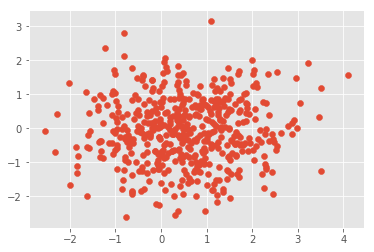

In [197]:
centers = [df['Not_Purchasing_Judge_quality'], df['Not_Purchasing_Bad_experience']]
X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1)
plt.scatter(X[:,0],X[:,1])
plt.show()